In [1]:
import torchvision

from torch import cuda, device, Tensor
from src.plots import plot_vae_training_result, plot_image
from src.vae.mnist_vae import ConditionalVae

device = device('cuda' if cuda.is_available() else 'cpu')

In [2]:
training_data = torchvision.datasets.FashionMNIST(root='../data/FMNIST_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
testing_data = torchvision.datasets.FashionMNIST(root='../data/FMNIST_test', train=False, download=True, transform=torchvision.transforms.ToTensor())

print(training_data)
print(testing_data)

input = training_data.data[:60000] / 255.0    # normalizing necessary to make pixels in [0, 1] range for FID
labels = training_data.targets[:60000]

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data/FMNIST_train
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../data/FMNIST_test
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
# Train VAE
vae = ConditionalVae(dim_encoding=3).to(device)

# try with model sigma
vae_model, vae_loss_li, kl_loss_li = vae.train_model(
    training_data=training_data,
    batch_size=32,
    epochs=10,
    learning_rate=0.01
)

Finished epoch:  1
Finished epoch:  2
Finished epoch:  3
Finished epoch:  4
Finished epoch:  5
Finished epoch:  6
Finished epoch:  7
Finished epoch:  8
Finished epoch:  9
Finished epoch:  10


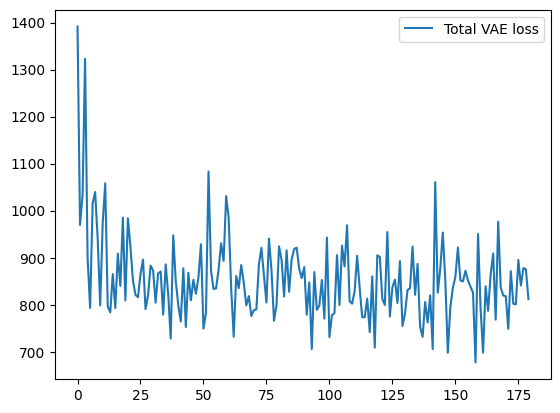

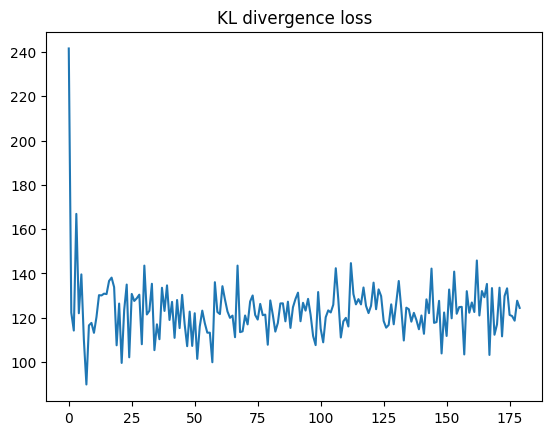

In [14]:
# move tensors to cpu before converting to np array
np_kl_loss_li = []

for output in kl_loss_li:
    if isinstance(output, Tensor):
        np_kl_loss_li.append(output.cpu().detach().numpy())

# plot results
plot_vae_training_result(
    input=input,
    labels=labels,
    vae_model=vae_model,
    vae_loss_li=vae_loss_li,
    kl_loss_li=np_kl_loss_li
)

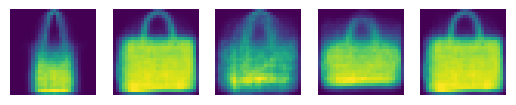

In [20]:
images = vae.generate_data(n_samples=5, target_label=8)
plot_image(images)

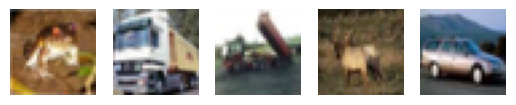

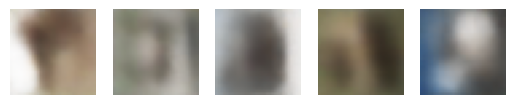

In [6]:
# from src.sampling import split_dirichlet
# 
# # generate imbalanced data set for comparison of distribution of input vs distribution of generated images
# training_data = torchvision.datasets.MNIST(root='../data/MNIST_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
# 
# input = training_data.data[:60000]
# labels = training_data.targets[:60000]
# 
# users_data = split_dirichlet(dataset=training_data, num_users=4, is_cfar=False, beta=0.5)
# 
# total_input = []
# total_labels = []
# total_counts = []
# for user_idx in users_data:
#     images = []
#     outputs = []
#     counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 
#     for data_idx in users_data[user_idx]:
#         image = input[int(data_idx)]
#         images.append(image)
#         label = labels[int(data_idx)]
#         outputs.append(label)
#         counts[label] +=1
#     total_input.append(images)
#     total_labels.append(outputs)
#     total_counts.append(counts)
# 
# user_idx = 0
# sample_input = total_input[user_idx]
# sample_label = total_labels[user_idx]
# 
# input_tensor = torch.stack(sample_input)
# label_tensor = torch.stack(sample_label)
# 
# plot_image_label_two (input_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())
# 
# assert input_tensor.shape[0] == label_tensor.shape[0]
# 
# training_data.data = input_tensor
# training_data.targets = label_tensor
# 
# assert training_data.data.shape == input_tensor.shape
# assert training_data.targets.shape == label_tensor.shape
# 
# 
# # Train VAE on imbalanced dataset
# vae_imbalanced = VaeAutoencoder(dim_encoding=2)
# 
# _, _, _ = vae_imbalanced.train_model(
#     training_data,
#     batch_size=50,
#     beta=1000,
#     epochs=20
# )
# 
# gen_image = vae_imbalanced.generate_data(n_samples=sum(total_counts[user_idx]))
# gen_output = classifier.generate_labels(gen_image)
# gen_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# for tensor_label in gen_output:
#     gen_counts[tensor_label[0]]+=1
# 
# # plot generated data
# plot_image_label_two(gen_image.cpu().detach().numpy(), gen_output.cpu().detach().numpy())
# 
# print("Input counts: ", total_counts[user_idx])
# print("Generated counts: ", gen_counts)

In [ ]:
# x = vae.generate_data(n_samples=10000)
# print("Number of images: ", x.shape[0])
# 
# labels = classifier.generate_labels(x)
# print("Labels: ", labels.shape)

In [ ]:
# # Determine FID
# # generate 500 images
# syn_input, _ = vae.generate_data(n_samples=500)
# input = input[:500]
# 
# input_rgb = input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# syn_input_rgb = syn_input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# 
# # compute FID score
# fid_score = frechet_inception_distance(input_rgb, syn_input_rgb)
# print("Frechet Inception Distance: ", fid_score)